In [21]:
# Dependency
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn

# Resources
import import_ipynb
import Covid19_Quarantine
TotalCovid19Cases = Covid19_Quarantine.TotalCovid19Cases
TotalCovid19Cases.tail()

,Italy_test,US_test,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death,China_active,Italy_active,US_active
2020-04-28,NaN,NaN,83940,201505,1012582,78422,68941,115936,4637,27359,58355,881,105205,838291
2020-04-29,NaN,NaN,83944,203591,1039909,78474,71252,120720,4637,27682,60967,833,104657,858222
2020-04-30,NaN,NaN,83956,205463,1069424,78523,75945,153947,4637,27967,62996,796,101551,852481
2020-05-01,NaN,NaN,83959,207428,1103461,78573,78249,164015,4637,28236,64943,749,100943,874503
2020-05-02,NaN,NaN,83959,209328,1132539,78586,79914,175382,4637,28710,66369,736,100704,890788


In [2]:
US_confirmid_Data =  TotalCovid19Cases[['US_confirmid']]

# The days we need to predict
predictedDays = 5

# Add prediction column
dataSet = US_confirmid_Data.assign(Prediction = US_confirmid_Data['US_confirmid'].shift(-predictedDays))

# Get a numpy array from the data
independent = np.array(dataSet.drop(['Prediction'],1))

# #Remove the last rows we try to predict
independent = independent[:-predictedDays]

In [3]:
# Dependent variable

# get a numpy array from the dataframe
dependent = np.array(dataSet['Prediction'])

# All the dependant value expected
dependent = dependent[:-predictedDays]

dependent

array([5.000000e+00, 5.000000e+00, 5.000000e+00, 5.000000e+00,
       7.000000e+00, 8.000000e+00, 8.000000e+00, 1.100000e+01,
       1.100000e+01, 1.100000e+01, 1.100000e+01, 1.100000e+01,
       1.100000e+01, 1.100000e+01, 1.100000e+01, 1.200000e+01,
       1.200000e+01, 1.300000e+01, 1.300000e+01, 1.300000e+01,
       1.300000e+01, 1.300000e+01, 1.300000e+01, 1.300000e+01,
       1.300000e+01, 1.500000e+01, 1.500000e+01, 1.500000e+01,
       5.100000e+01, 5.100000e+01, 5.700000e+01, 5.800000e+01,
       6.000000e+01, 6.800000e+01, 7.400000e+01, 9.800000e+01,
       1.180000e+02, 1.490000e+02, 2.170000e+02, 2.620000e+02,
       4.020000e+02, 5.180000e+02, 5.830000e+02, 9.590000e+02,
       1.281000e+03, 1.663000e+03, 2.179000e+03, 2.727000e+03,
       3.499000e+03, 4.632000e+03, 6.421000e+03, 7.783000e+03,
       1.374700e+04, 1.927300e+04, 2.560000e+04, 3.327600e+04,
       4.384300e+04, 5.373600e+04, 6.577800e+04, 8.383600e+04,
       1.016570e+05, 1.214650e+05, 1.409090e+05, 1.6183

In [4]:
independentTrain, independentTest, dependentTrain, dependentTest = train_test_split(independent, dependent, test_size=0.2)

In [5]:
# Create Linear Regression Model
linearRegression = LinearRegression()

# Train the model
linearRegression.fit(independentTrain, dependentTrain)

# Test the model
confidence = linearRegression.score(independentTest, dependentTest)

# Test Confidence
print("Confidence: ", confidence)

Confidence:  0.9920124038357225


In [6]:
lastRecords = np.array(dataSet.drop(['Prediction'],1))[-predictedDays*2:]
lastRecords

array([[ 869170],
       [ 905358],
       [ 938154],
       [ 965785],
       [ 988197],
       [1012582],
       [1039909],
       [1069424],
       [1103461],
       [1132539]], dtype=int64)

In [7]:
# Get predicted Data
prediction_data = linearRegression.predict(lastRecords)

# Convert the result to integer
predict = prediction_data.astype(int)
predict

array([1052517, 1095375, 1134216, 1166940, 1193482, 1222362, 1254726,
       1289681, 1329991, 1364428])

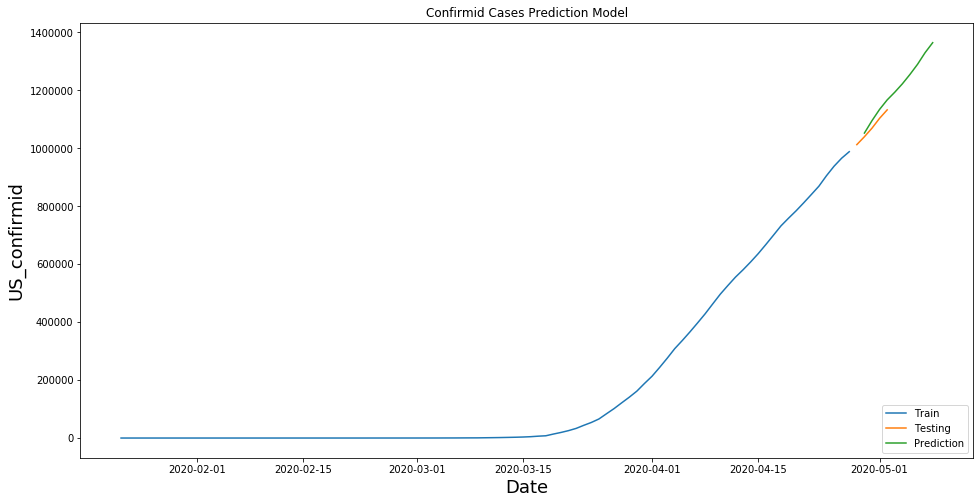

In [8]:
# Get the training data for Visualization
train = dataSet[:-predictedDays]

# Get the Testing data for Visualization
testingData = dataSet[-predictedDays:]

# The predection data with the new dates
newDate = dataSet.last_valid_index() + datetime.timedelta(days=-predictedDays+2)
datelist = pd.date_range(newDate , periods=predictedDays*2).tolist()
usConfirmidPrediction = pd.DataFrame(predict, columns = ['US_confirmid_prediction'], index = datelist)

#Visualize Confirmid Cases Prediction Model
plt.figure(figsize=(16,8))
plt.title('Confirmid Cases Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('US_confirmid', fontsize=18)
plt.plot(train['US_confirmid'])
plt.plot(testingData[[ 'US_confirmid']])
plt.plot(usConfirmidPrediction[[ 'US_confirmid_prediction']])
plt.legend(['Train', 'Testing', 'Prediction'], loc='lower right')
plt.show()

In [9]:
# merge predected data with the real data for compare 
usConfirmidPrediction = pd.merge(
    US_confirmid_Data, 
    usConfirmidPrediction, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
usConfirmidPrediction.tail(predictedDays*2)

,US_confirmid,US_confirmid_prediction
2020-04-29,1039909.0,1052517.0
2020-04-30,1069424.0,1095375.0
2020-05-01,1103461.0,1134216.0
2020-05-02,1132539.0,1166940.0
2020-05-03,NaN,1193482.0
2020-05-04,NaN,1222362.0
2020-05-05,NaN,1254726.0
2020-05-06,NaN,1289681.0
2020-05-07,NaN,1329991.0
2020-05-08,NaN,1364428.0


In [10]:
# predected death
US_confirmidAndDeath =  TotalCovid19Cases[['US_confirmid','US_death']]
US_confirmidAndDeath.tail()

,US_confirmid,US_death
2020-04-28,1012582,58355
2020-04-29,1039909,60967
2020-04-30,1069424,62996
2020-05-01,1103461,64943
2020-05-02,1132539,66369


In [11]:
# Display the Correlation Matrix
US_confirmidAndDeath.corr()

,US_confirmid,US_death
US_confirmid,1.000000,0.993191
US_death,0.993191,1.000000


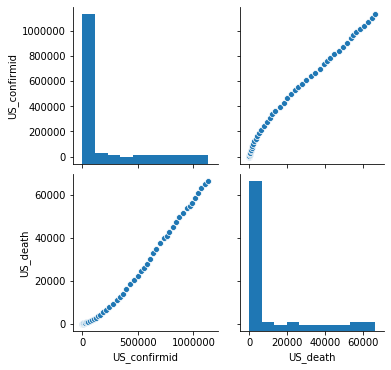

In [12]:
#Graph the Correlation Matrix
seaborn.pairplot(US_confirmidAndDeath)
plt.show()

In [13]:
# Get a numpy array from the data
independent = np.array(US_confirmidAndDeath['US_confirmid'])
independent

array([      1,       1,       2,       2,       5,       5,       5,
             5,       5,       7,       8,       8,      11,      11,
            11,      11,      11,      11,      11,      11,      12,
            12,      13,      13,      13,      13,      13,      13,
            13,      13,      15,      15,      15,      51,      51,
            57,      58,      60,      68,      74,      98,     118,
           149,     217,     262,     402,     518,     583,     959,
          1281,    1663,    2179,    2727,    3499,    4632,    6421,
          7783,   13747,   19273,   25600,   33276,   43843,   53736,
         65778,   83836,  101657,  121465,  140909,  161831,  188172,
        213242,  243622,  275367,  308650,  336802,  366317,  397121,
        428654,  462780,  496535,  526396,  555313,  580619,  607670,
        636350,  667592,  699706,  732197,  758809,  784326,  811865,
        840351,  869170,  905358,  938154,  965785,  988197, 1012582,
       1039909, 1069

In [14]:
# Dependent variable

# get a numpy array from the dataframe
dependent = np.array(US_confirmidAndDeath['US_death'])

dependent

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,     1,     6,     7,    11,    12,    14,
          17,    21,    22,    28,    36,    41,    49,    58,    73,
          99,   133,   164,   258,   349,   442,   586,   786,  1008,
        1316,  1726,  2265,  2731,  3420,  4192,  5367,  6501,  7921,
        9246, 10855, 12375, 13894, 16191, 18270, 20255, 22333, 24342,
       26086, 27870, 30262, 32734, 34827, 37411, 39753, 40945, 42659,
       45086, 47412, 49724, 51493, 53755, 54881, 56259, 58355, 60967,
       62996, 64943, 66369], dtype=int64)

In [15]:
independentTrain, independentTest, dependentTrain, dependentTest = train_test_split(independent, dependent, test_size=0.2)

In [16]:
# Create Linear Regression Model to predect Deathes based on confirmed casses
linearRegression = LinearRegression()

# Train the model
linearRegression.fit(independentTrain.reshape(-1, 1), dependentTrain.reshape(-1, 1))

# Test the model
confidence = linearRegression.score(independentTest.reshape(-1, 1), dependentTest.reshape(-1, 1))

# Test Confidence
print("Confidence: ", confidence)

Confidence:  0.9822809152755257


In [17]:
# Get death predected data based on confirmed prediction
prediction_data = linearRegression.predict(predict.reshape(-1, 1))

# Convert the result to integer
US_death_prediction = prediction_data.astype(int)
US_death_prediction

array([[57363],
       [59733],
       [61881],
       [63691],
       [65159],
       [66756],
       [68545],
       [70478],
       [72707],
       [74612]])

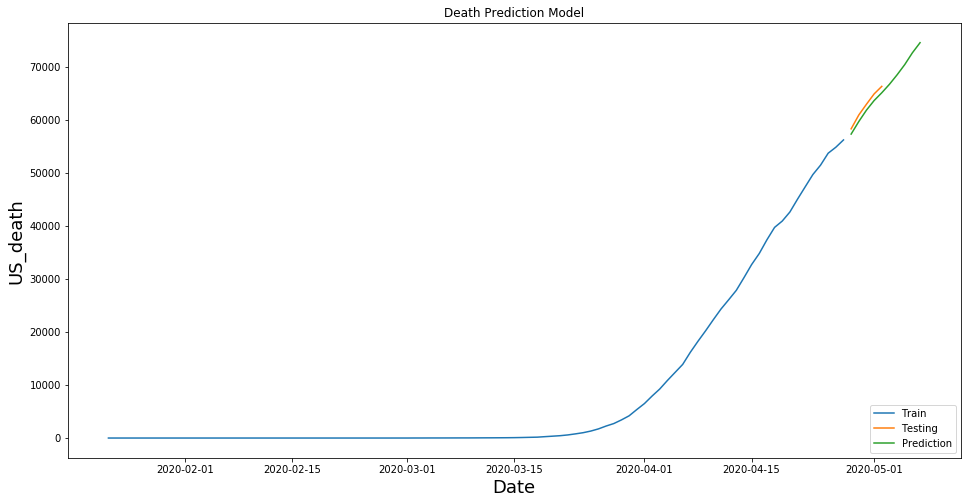

In [18]:
train = US_confirmidAndDeath[:-predictedDays]
testingData = US_confirmidAndDeath[-predictedDays:]

# The predection data with the new dates
newDate = US_confirmidAndDeath.last_valid_index() + datetime.timedelta(days=-predictedDays+1)
datelist = pd.date_range(newDate , periods=predictedDays*2).tolist()
usDeathPrediction = pd.DataFrame(US_death_prediction, columns = ['US_death_prediction'], index = datelist)

#Visualize Death Prediction Model
plt.figure(figsize=(16,8))
plt.title('Death Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('US_death', fontsize=18)
plt.plot(train['US_death'])
plt.plot(testingData[[ 'US_death']])
plt.plot(usDeathPrediction[[ 'US_death_prediction']])
plt.legend(['Train', 'Testing', 'Prediction'], loc='lower right')
plt.show()

In [19]:
# merge predected data with the real data for compare 
usConfirmidAndDeathPrediction = pd.merge(
    US_confirmidAndDeath, 
    usDeathPrediction, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
usConfirmidAndDeathPrediction.tail(predictedDays*2)

,US_confirmid,US_death,US_death_prediction
2020-04-28,1012582.0,58355.0,57363.0
2020-04-29,1039909.0,60967.0,59733.0
2020-04-30,1069424.0,62996.0,61881.0
2020-05-01,1103461.0,64943.0,63691.0
2020-05-02,1132539.0,66369.0,65159.0
2020-05-03,NaN,NaN,66756.0
2020-05-04,NaN,NaN,68545.0
2020-05-05,NaN,NaN,70478.0
2020-05-06,NaN,NaN,72707.0
2020-05-07,NaN,NaN,74612.0
